In [1]:
import random
import numpy as np
import csv

# Define the range of possible dimensions and properties for each item
length_min, length_max = 1, 100
width_min, width_max = 1, 100
height_min, height_max = 1, 100
weight_min, weight_max = 1, 100
fragility_options = ["fragile", "non-fragile"]
fragility_probs = [0.1, 0.9]  # 10% chance of being fragile

def generate_item_data():
  length = random.uniform(length_min, length_max)
  width = random.uniform(width_min, width_max)
  height = random.uniform(height_min, height_max)
  weight = random.uniform(weight_min, weight_max)
  fragility = np.random.choice(fragility_options, p=fragility_probs)
  stackable = random.choice([True, False])
  return {"length": length, "width": width, "height": height, "weight": weight, 
          "fragility": fragility, "stackable": stackable}

# Generate data for multiple orders
order_data = []
for _ in range(1000):  # Generate 1000 orders (adjust as needed)
  num_items = random.randint(1, 10)  # Random number of items per order (1-10)
  order_items = [generate_item_data() for _ in range(num_items)]
  order_data.append({"items": order_items})

# Save data to CSV file
with open("order_data.csv", 'w', newline='') as csvfile:
  fieldnames = ["items"]
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
  writer.writeheader()
  for order in order_data:
    writer.writerow(order)

print("Order data saved to order_data.csv")

Order data saved to order_data.csv


In [2]:
class Box:
    def __init__(self, name, length, width, height):
        self.name = name
        self.length = length
        self.width = width
        self.height = height
        self.remaining_length = length
        self.remaining_width = width
        self.remaining_height = height
        self.items = []

    def can_fit(self, item):
        return (self.remaining_length >= item['length'] and
                self.remaining_width >= item['width'] and
                self.remaining_height >= item['height'])

    def add_item(self, item):
        self.items.append(item)
        self.remaining_length -= item['length']
        self.remaining_width -= item['width']
        self.remaining_height -= item['height']

# Define your box sizes
box_sizes = [('Small', 10, 10, 10), ('Medium', 20, 20, 20), ('Large', 30, 30, 30)]

def calculate_minimum_box_size(order, box_sizes):
    # Sort items in decreasing order of volume
    items = sorted(order['items'], key=lambda item: item['length']*item['width']*item['height'], reverse=True)

    min_boxes = float('inf')
    best_box_size = None

    # Try each box size
    for box_size in box_sizes:
        # Start with an empty box
        boxes = [Box(*box_size)]

        # For each item, place it in the first box where it fits
        for item in items:
            for box in boxes:
                if box.can_fit(item):
                    box.add_item(item)
                    break
            else:
                # If item doesn't fit in any box, start a new box
                new_box = Box(*box_size)
                new_box.add_item(item)
                boxes.append(new_box)

        # If this box size results in fewer boxes, update min_boxes and best_box_size
        if len(boxes) < min_boxes:
            min_boxes = len(boxes)
            best_box_size = box_size[0]  # Get the name of the box size

    # The minimum box size for this order is the box size that results in the least number of boxes
    return best_box_size, min_boxes

In [3]:
# Load the order data
import pandas as pd
import ast
order_data = pd.read_csv('order_data.csv')

# Calculate the minimum box size for each order
for index, order in order_data.iterrows():
    # Convert the items string to list of dictionaries
    items = ast.literal_eval(order['items'])
    order = {'items': items}
    best_box_size, min_boxes = calculate_minimum_box_size(order, box_sizes)
    print(f"The best box size for order {index} is {best_box_size} with {min_boxes} boxes")

The best box size for order 0 is Small with 4 boxes
The best box size for order 1 is Small with 4 boxes
The best box size for order 2 is Small with 6 boxes
The best box size for order 3 is Small with 11 boxes
The best box size for order 4 is Small with 11 boxes
The best box size for order 5 is Small with 8 boxes
The best box size for order 6 is Large with 6 boxes
The best box size for order 7 is Small with 7 boxes
The best box size for order 8 is Small with 10 boxes
The best box size for order 9 is Small with 8 boxes
The best box size for order 10 is Small with 11 boxes
The best box size for order 11 is Small with 4 boxes
The best box size for order 12 is Large with 6 boxes
The best box size for order 13 is Large with 8 boxes
The best box size for order 14 is Large with 6 boxes
The best box size for order 15 is Small with 2 boxes
The best box size for order 16 is Small with 7 boxes
The best box size for order 17 is Small with 2 boxes
The best box size for order 18 is Small with 10 boxe

In [15]:
import pandas as pd
import ast
from collections import Counter

# Load the order data
order_data = pd.read_csv('order_data.csv')

# Initialize a Counter object
box_counter = Counter()

def calculate_minimum_box_size(item, box_sizes):
    # Calculate item volume
    item_volume = item['length']*item['width']*item['height']
    
    min_boxes = float('inf')
    best_box_size = None

    # Your box size calculation logic here

    return best_box_size, min_boxes

# Calculate the minimum box size for each order
for index, order in order_data.iterrows():
    # Convert the items string to list of dictionaries
    items = ast.literal_eval(order['items'])
    order = {'items': items}
    best_box_size, min_boxes = calculate_minimum_box_size(order, box_sizes)
    
    # Update the counter with the best box size
    box_counter[best_box_size] += min_boxes

# Print the frequency distribution
print(box_counter)

KeyError: 'length'

In [5]:
def knapsack(box_costs, box_counts, n, W):
    # Initialize the matrix
    K = [[0 for w in range(W + 1)] for i in range(n + 1)]
    
    # Build the matrix K in bottom-up manner
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif box_costs[i-1] <= w:
                K[i][w] = max(box_counts[i-1] + K[i-1][w-box_costs[i-1]], K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
    
    return K[n][W]

# Define the cost and count of each box size
box_costs = [10, 250, 380]  # Replace with your actual costs
box_counts = [5562, 204, 606]  # Replace with your actual counts
n = len(box_costs)

# Define the total cost limit
W = 10  # Replace with your actual limit

# Calculate the maximum count
max_count = knapsack(box_costs, box_counts, n, W)
print(f"The maximum count is {max_count}")

The maximum count is 5562


In [6]:
def pack_boxes(items, box_size):
    # Sort the items in decreasing order by height
    items.sort(key=lambda item: item['height'], reverse=True)

    # Initialize the list of boxes
    boxes = []

    # Pack the items
    for item in items:
        # Try to place the item in each box
        for box in boxes:
            if box['remaining_height'] >= item['height'] and box['remaining_width'] >= item['width'] and box['remaining_length'] >= item['length']:
                # The item fits in the box, so place it
                box['items'].append(item)
                box['remaining_height'] -= item['height']
                box['remaining_width'] -= item['width']
                box['remaining_length'] -= item['length']
                break
        else:
            # The item does not fit in any box, so start a new box
            box = {
                'items': [item],
                'remaining_height': box_size['height'] - item['height'],
                'remaining_width': box_size['width'] - item['width'],
                'remaining_length': box_size['length'] - item['length'],
            }
            boxes.append(box)

    return boxes

In [7]:


import pandas as pd

# Load the orders from a CSV file
orders_df = pd.read_csv('order_data.csv')

print(orders_df['items'].iloc[0])

[{'length': 20.69609158205068, 'width': 38.33197384900465, 'height': 30.10956091681119, 'weight': 93.18459373467941, 'fragility': 'non-fragile', 'stackable': False}, {'length': 39.209407159532795, 'width': 34.31918548641846, 'height': 80.65914907180687, 'weight': 48.22354992249478, 'fragility': 'non-fragile', 'stackable': False}, {'length': 15.971224648092278, 'width': 78.70241804034107, 'height': 18.97570479733246, 'weight': 38.85204878409407, 'fragility': 'non-fragile', 'stackable': False}]


In [8]:
# this code is to see how many items in all the orders can fit in the 3 sized boxes

import pandas as pd

# Load the orders from a CSV file
orders_df = pd.read_csv('order_data.csv')

# Convert the items from strings to lists of dictionaries
orders_df['items'] = orders_df['items'].apply(ast.literal_eval)

# Define the box sizes
box_sizes = [
    {'name': 'Small', 'length': 10, 'width': 10, 'height': 10},
    {'name': 'Medium', 'length': 20, 'width': 20, 'height': 20},
    {'name': 'Large', 'length': 30, 'width': 30, 'height': 30},
]

# Initialize the counter for each box size
box_counters = {box_size['name']: 0 for box_size in box_sizes}

# Iterate over the orders
for _, order in orders_df.iterrows():
    # Try to pack the items in each box size
    for box_size in box_sizes:
        boxes = pack_boxes(order['items'], box_size)
        box_counters[box_size['name']] += len(boxes)

# Print the number of items that can fit in each box size
for box_size, count in box_counters.items():
    print(f"{count} items can fit in a {box_size} box")

5577 items can fit in a Small box
5577 items can fit in a Medium box
5576 items can fit in a Large box


In [9]:
# this code is to see how many items in all the orders can fit in the 3 sized boxes

import pandas as pd

# Load the orders from a CSV file
orders_df = pd.read_csv('order_data.csv')
 
# Convert the items from strings to lists of dictionaries
orders_df['items'] = orders_df['items'].apply(ast.literal_eval)

# Define the box sizes
box_sizes = [
    {'name': 'Small', 'length': 10, 'width': 10, 'height': 10},
    {'name': 'Medium', 'length': 20, 'width': 20, 'height': 20},
    {'name': 'Large', 'length': 30, 'width': 30, 'height': 30},
]

# Initialize the counter for each box size
box_counters = {box_size['name']: 0 for box_size in box_sizes}

# Iterate over the orders
for _, order in orders_df.iterrows():
    # Try to pack the items in each box size
    for box_size in box_sizes:
        boxes = pack_boxes(order['items'], box_size)
        box_counters[box_size['name']] += len(boxes)

# Print the number of items that can fit in each box size
for box_size, count in box_counters.items():
    print(f"{count} items can fit in a {box_size} box")

5577 items can fit in a Small box
5577 items can fit in a Medium box
5576 items can fit in a Large box


In [10]:
# extra things
import pandas as pd
import numpy as np
import itertools
import ast

def convert_items_to_3d_array(items, max_dim=100):
    # Initialize a 3D array filled with zeros
    array = np.zeros((max_dim, max_dim, max_dim))

    # Iterate over the items
    for item in items:
        # Generate all possible orientations of the item
        orientations = list(itertools.permutations([int(item['length']), int(item['width']), int(item['height'])]))

        # Try to fit the item in the array in each orientation
        for orientation in orientations:
            if array[:orientation[0], :orientation[1], :orientation[2]].sum() == 0:
                # If the item can be fit in this orientation, fill the corresponding region of the array with ones
                array[:orientation[0], :orientation[1], :orientation[2]] = 1
                break

    return array.flatten()

# Load the CSV file
df = pd.read_csv('order_data.csv')

# Convert the string representation of list to list
df['items'] = df['items'].apply(ast.literal_eval)

# Convert the items in each order to a 3D array
df['items_3d'] = df['items'].apply(convert_items_to_3d_array)

# Save the DataFrame as a new CSV file
df.to_csv('order_data_3d.csv', index=False)

In [11]:
import numpy as np
import pandas as pd

# Initialize a list to store the orders
orders = []

# Generate 100 orders
for _ in range(100):
    # Initialize a list to store the products in the current order
    order = []

    # Generate 3 products with random dimensions
    for _ in range(3):
        # Generate random dimensions
        length = np.random.randint(1, 100)
        width = np.random.randint(1, 100)
        height = np.random.randint(1, 100)

        # Create a 3D array representing the product
        product = np.zeros((100, 100, 100))
        product[:length, :width, :height] = 1

        # Flatten the 3D array into a 1D array
        product = product.flatten()

        # Add the product to the current order
        order.append(product)

    # Add the current order to the orders
    orders.append(order)

# Convert the orders to a DataFrame
df = pd.DataFrame({'items': orders})

# Save the DataFrame as a CSV file
df.to_csv('order_data_3d.csv', index=False)

Product 1:


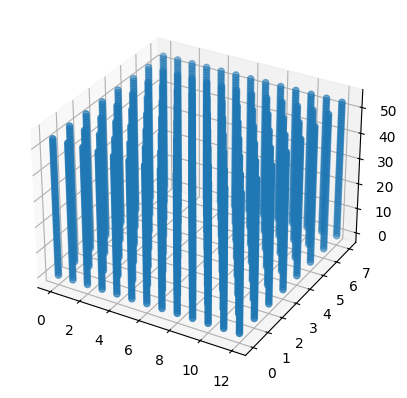

Product 2:


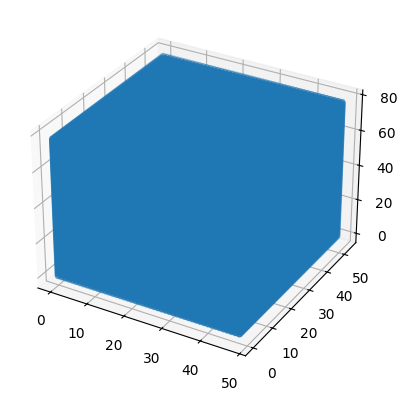

Product 3:


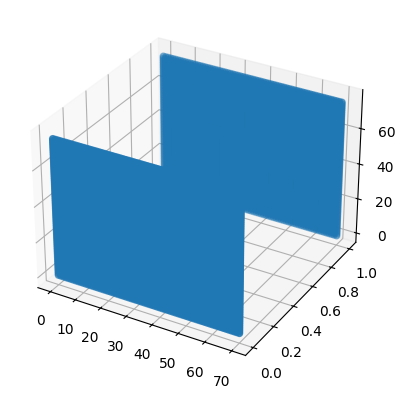

Product 4:


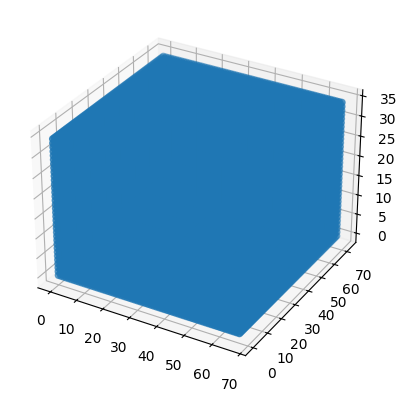

Product 5:


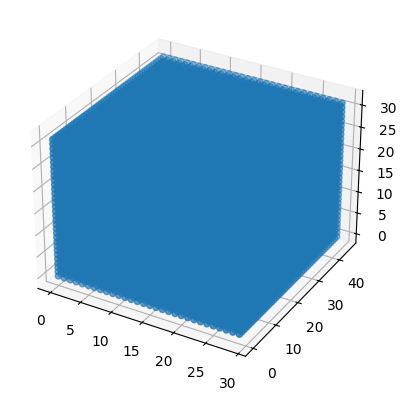

In [12]:
import matplotlib.pyplot as plt

def plot_3d_box(array_3d, max_dim=100):
    fig = plt.figure()

    # Explicitly import Axes3D at the time of creating the 3D plot
    ax = fig.add_subplot(111, projection='3d')

    # Convert the 1D array back to a 3D array
    array_3d = array_3d.reshape((max_dim, max_dim, max_dim))

    # Get the coordinates of the points where the value is 1
    x, y, z = np.where(array_3d == 1)

    # Plot the points
    ax.scatter(x, y, z)
    plt.show()

# Get the 3D arrays of the first 5 products
arrays_3d = df['items'].apply(lambda x: x[0]).tolist()[:5]  # Assuming each item in 'items' column is a list of products

# Plot the 3D box for each product
for i, array_3d in enumerate(arrays_3d):
    print(f"Product {i+1}:")
    plot_3d_box(array_3d)           